In [1]:
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### Data preprocessing


In [173]:
data = pd.read_csv('data.csv')

In [174]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [198]:
y_data = data['price']
x_data = data['sqft_living']

In [199]:
x_data

0       1340
1       3650
2       1930
3       2000
4       1940
        ... 
4595    1510
4596    1460
4597    3010
4598    2090
4599    1490
Name: sqft_living, Length: 4600, dtype: int64

In [200]:
y_data

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [201]:
len(x_data), len(y_data)

(4600, 4600)

In [202]:
def train_validation_split(x, y, validation_size=0.2, random_state=None):
    x_validation = x.sample(frac=validation_size, random_state = random_state)
    y_validation = y[x_validation.index]

    x_train = x.drop(x_validation.index)
    y_train = y.drop(y_validation.index)
    return np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation)

In [203]:
x_train, y_train, x_validation, y_validation = train_validation_split(x_data, y_data, validation_size = 0.2, random_state = 0) 

In [204]:
len(x_train), len(y_train)

(3680, 3680)

In [205]:
len(x_validation), len(y_validation)

(920, 920)

In [206]:
x_train

array([1340, 1930, 2000, ..., 3010, 2090, 1490], shape=(3680,))

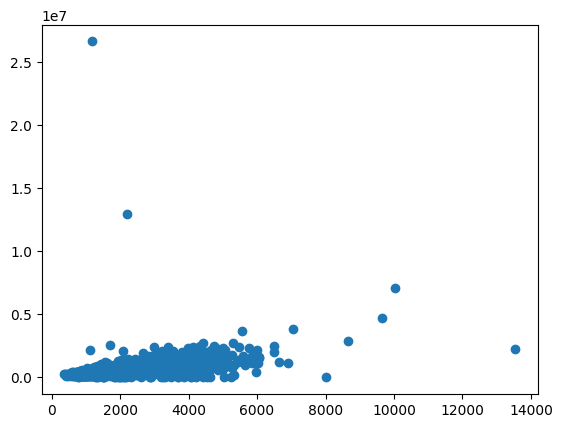

In [207]:
plt.scatter(x_train, y_train)

In [208]:



x_train

array([1340, 1930, 2000, ..., 3010, 2090, 1490], shape=(3680,))

In [209]:
y_train


array([313000.      , 342000.      , 420000.      , ..., 416904.166667,
       203400.      , 220600.      ], shape=(3680,))

In [211]:
x_train[1], y_train[1]


(np.int64(1930), np.float64(342000.0))

In [212]:
len(x_train), len(y_train)

(3680, 3680)

In [213]:
x_train, y_train

(array([1340, 1930, 2000, ..., 3010, 2090, 1490], shape=(3680,)),
 array([313000.      , 342000.      , 420000.      , ..., 416904.166667,
        203400.      , 220600.      ], shape=(3680,)))

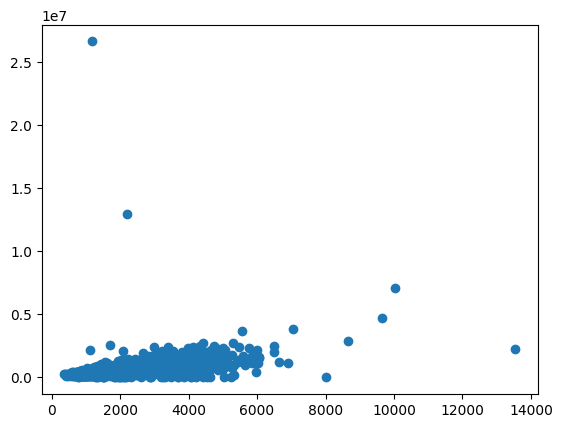

In [214]:
plt.scatter(x_train, y_train)
plt.show()

### Train

In [242]:
def compute_cost(x, y, w, b):
    m = x.shape[0] 
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    return cost / (2 * m) 

In [243]:
compute_cost(x_train, y_train, 0.5, 10)

np.float64(9174090955.0)

In [244]:
def compute_gradients(x, y, w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(0,m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return float(dj_dw), float(dj_db)

In [245]:
compute_gradients(x_train, y_train, w = 10, b = 1)

(-9213136.0, -127359.0)

In [246]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost_function, gradient_function):
    w = copy.deepcopy(w_in) 
    b = copy.deepcopy(b_in)
    J_history = []
    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        print(f"Iteration: {i} | Cost: {cost:.3e} | dj_dw: {dj_dw:.3e} | dj_db: {dj_db:.3e} | w: {w:.3e} | b: {b:.3e}")
    
    print(f"\n(w, b) found by gradient descent ({w:.3e}, {b:.3e})")
    return w, b, J_history

In [256]:
w_init = 0
b_init = 0
iterations = 20
alpha = 1.0e-6
w_final, b_final, J_history = gradient_descent(x=x_train, y=y_train,alpha=alpha, num_iterations = iterations,w_in=w_init,b_in=b_init,cost_function=compute_cost,gradient_function=compute_gradients) 

Iteration: 0 | Cost: 9.094e+09 | dj_dw: -9.260e+06 | dj_db: -1.280e+05 | w: 9.260e+00 | b: 1.280e-01
Iteration: 1 | Cost: 9.010e+09 | dj_dw: -9.217e+06 | dj_db: -1.274e+05 | w: 1.848e+01 | b: 2.554e-01
Iteration: 2 | Cost: 8.926e+09 | dj_dw: -9.174e+06 | dj_db: -1.268e+05 | w: 2.765e+01 | b: 3.822e-01
Iteration: 3 | Cost: 8.843e+09 | dj_dw: -9.131e+06 | dj_db: -1.262e+05 | w: 3.678e+01 | b: 5.085e-01
Iteration: 4 | Cost: 8.760e+09 | dj_dw: -9.088e+06 | dj_db: -1.256e+05 | w: 4.587e+01 | b: 6.341e-01
Iteration: 5 | Cost: 8.678e+09 | dj_dw: -9.045e+06 | dj_db: -1.251e+05 | w: 5.491e+01 | b: 7.592e-01
Iteration: 6 | Cost: 8.598e+09 | dj_dw: -9.003e+06 | dj_db: -1.245e+05 | w: 6.392e+01 | b: 8.836e-01
Iteration: 7 | Cost: 8.517e+09 | dj_dw: -8.961e+06 | dj_db: -1.239e+05 | w: 7.288e+01 | b: 1.008e+00
Iteration: 8 | Cost: 8.438e+09 | dj_dw: -8.919e+06 | dj_db: -1.233e+05 | w: 8.180e+01 | b: 1.131e+00
Iteration: 9 | Cost: 8.359e+09 | dj_dw: -8.877e+06 | dj_db: -1.228e+05 | w: 9.067e+01 | b: 

## Metrics

In [248]:
J_history


[np.float64(9154288870.07251),
 np.float64(9128649899.797138),
 np.float64(9103082886.653988),
 np.float64(9077587628.691538),
 np.float64(9052163924.525055),
 np.float64(9026811573.335003),
 np.float64(9001530374.865463),
 np.float64(8976320129.42254),
 np.float64(8951180637.872787),
 np.float64(8926111701.641647),
 np.float64(8901113122.711857),
 np.float64(8876184703.621916),
 np.float64(8851326247.464493),
 np.float64(8826537557.884907),
 np.float64(8801818439.079538),
 np.float64(8777168695.79431),
 np.float64(8752588133.32314),
 np.float64(8728076557.506388),
 np.float64(8703633774.729342),
 np.float64(8679259591.920675)]

Text(0.5, 1.0, 'Loss evolution')

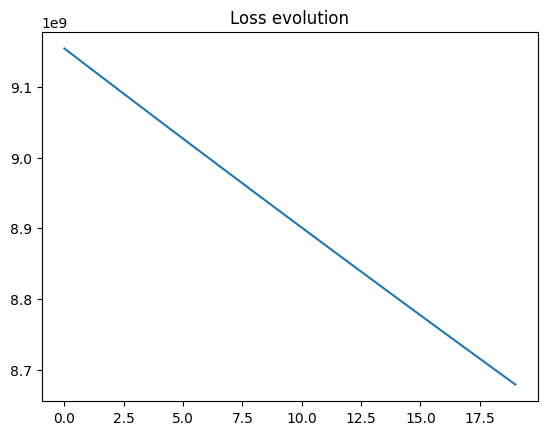

In [249]:
plt.plot(J_history)
plt.title("Loss evolution")

In [250]:
def r2_score(y, y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    return 1 - num/denom
    

In [251]:
y_ = [ w_final * i + b_final for i in x_train]

In [252]:
print(y_)

[np.float64(1645.5082054772242), np.float64(2742.00837675258), np.float64(3290.258462390257), np.float64(4386.758633665613), np.float64(5483.258804940969)]


In [253]:
r2_score(y_train, y_)

np.float64(-7.78467570032457)

## Prediction

In [254]:
size_of_house = 20
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   
size_of_house = 50
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   
size_of_house = 60
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   
size_of_house = 50
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   
size_of_house = 80
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   
size_of_house = 100
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   
size_of_house = 120
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   
size_of_house = 150
print(f"A house with size (m^2) {size_of_house} has a price of {w_final * size_of_house + b_final}$")   

A house with size (m^2) 20 has a price of 1097.2581198395467$
A house with size (m^2) 50 has a price of 2742.00837675258$
A house with size (m^2) 60 has a price of 3290.258462390257$
A house with size (m^2) 50 has a price of 2742.00837675258$
A house with size (m^2) 80 has a price of 4386.758633665613$
A house with size (m^2) 100 has a price of 5483.258804940969$
A house with size (m^2) 120 has a price of 6579.758976216323$
A house with size (m^2) 150 has a price of 8224.509233129356$


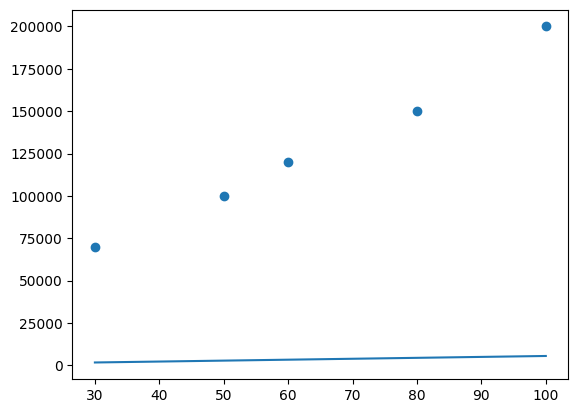

In [255]:
plt.scatter(x_train, y_train)
plt.plot(x_train, w_final * x_train + b_final)